In [1]:
import sys
sys.path.insert(0, '/home/work/Simulation/G2/G2Ana/SRKAnalysis')
import srkglobal
import srkplotting as spl
import numpy as np
from scipy.optimize import curve_fit

Welcome to JupyROOT 6.12/06


In [2]:
srkglobal.set_computer("home_laptop")
srkglobal.set_graphs_dir('/home/work/Simulation/G2/G2Out/graphs/')
bid = 78
id1 = 79
id2 = 80
#base_phi = spl.make_tree_to_array(bid)[4]
#base_theta = spl.make_tree_to_array(bid)[5]
#baseB = spl.make_tree_to_array(bid)[6:]
#print baseB
time_arr = spl.make_timeline(bid)
time1 = spl.make_timeline(id1)
time2 = spl.make_timeline(id2)

tree = spl.make_tree_to_array(bid)
tree1 = spl.make_tree_to_array(id1)
tree2 = spl.make_tree_to_array(id2)
#corresponds to [Bquad, Bsext, Bboth], within: [posx, posz, velx, velz, phi, theta, Bx, By, Bz]

In [14]:
vx = tree[3]
vy = tree[4]
vz = tree[5]

In [159]:
vx1 = tree1[3]
vx2 = tree2[3]
vz1 = tree1[5]
vz2 = tree2[5]

In [160]:
vy1 = tree1[4]
vy2 = tree2[4]

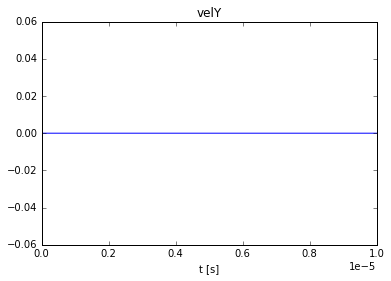

In [15]:
spl.plot_single('velY', vy, time_arr, 'show')

In [13]:
vy.max()

167466.68703279278

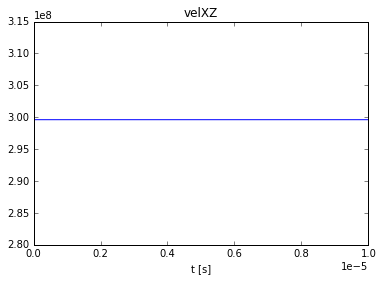

0
299617841.647
299617841.647
299617841.647
299617841.647
299617841.647
299617841.647
299617841.647
299617841.647
299617841.647
299617841.647


In [212]:
vxz = np.sqrt(vx**2 + vz**2)
spl.plot_single('velXZ', vxz, time_arr, 'show')
#vxz.mean()
print np.argmax(vxz>0)
vxz[42]
for i in range(10):
    print vxz[i]

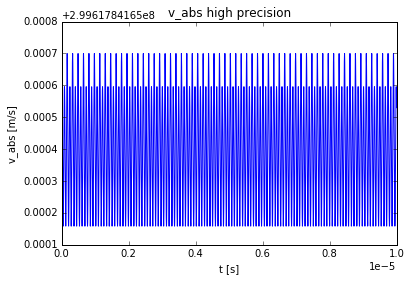

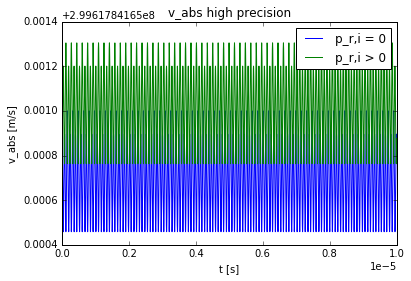

In [172]:
vxz1 = np.sqrt(vx1**2 + vz1**2)
vxz2 = np.sqrt(vx2**2 + vz2**2)
v_res = vxz1 - vxz2
spl.plot_single('v_abs high precision', vxz1, time2, 'show', 'v_abs [m/s]')
#spl.plot_single('velXZ residual', v_res, time1, 'show')
#spl.plot_single('', vxz2[:150], time1[:150], 'show')
#print vxz2[:150].max()
#print vxz2[:50].max()
spl.plot_comparative('v_abs high precision', [vxz1, vxz2], time1, 'both', 'v_abs [m/s]', ['p_r,i = 0', 'p_r,i > 0'])

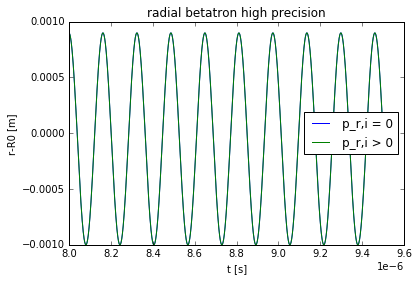

In [176]:
x1 = tree1[0]
z1 = tree1[2]
x2 = tree2[0]
z2 = tree2[2]
r1 = np.sqrt(x1**2 + z1**2) - 7.112
r2 = np.sqrt(x2**2 + z2**2) - 7.112
r_res = r1[42:] - r2[:-42]
#spl.plot_single('R residual', r_res, time1[42:], 'show')
r_res[0]/299617841.647
test_cos = cosinus(time1[:500], -0.001, 3.87e+07, 0)
spl.plot_comparative('radial betatron high precision', [r1[8042:9542], r2[8000:9500]], time1[8000:9500], 'both', 'r-R0 [m]', ['p_r,i = 0', 'p_r,i > 0'])
#spl.plot_comparative('', [z1[8000:9500], z2[8000:9500]], time1[:1500], 'show')

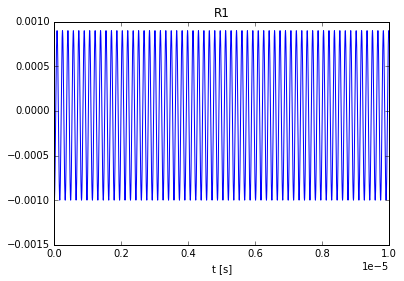

[ -9.49351434e-04   3.86803008e+07  -5.06109531e-05] [[  1.41228180e-19   3.94709952e-14   1.36395714e-22]
 [  3.94709952e-14   4.71887215e-03  -1.06226511e-13]
 [  1.36395714e-22  -1.06226511e-13   7.06861500e-20]]


In [177]:
spl.plot_single('R1', r1, time1, 'show')
beta_r = 3.9134e7
r1pars, r1covs = curve_fit(cosinus, time1, r1, [-0.001, 3.87e7, 0])
print r1pars, r1covs

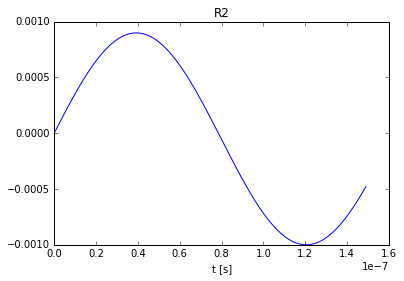

[ -9.49331858e-04   3.86803007e+07   1.62408669e+00  -5.06035136e-05] [[  1.41486903e-19  -1.83941927e-13   9.97890183e-19   6.92497958e-22]
 [ -1.83941927e-13   1.87633896e-02  -9.39213017e-08   9.55919112e-14]
 [  9.97890183e-19  -9.39213017e-08   6.26817906e-13  -2.94429645e-19]
 [  6.92497958e-22   9.55919112e-14  -2.94429645e-19   7.06767026e-20]]


In [179]:
def cosinus2(t, A, w, phi, o):
    return A*np.cos(w*t + phi) + o

spl.plot_single('R2', r2[:150], time2[:150], 'show')
beta_r = 3.9134e7
r2pars, r2covs = curve_fit(cosinus2, time2, r2, [0.001, 3.87e7, np.pi/2, 0])
print r2pars, r2covs

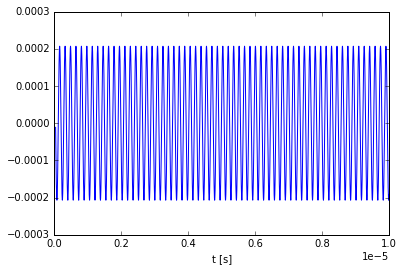

In [122]:
test1 = cosinus(time1[42:]-1.535e-15, 2.06965667e-04, 3.86803006e+07, 0)
test2 = sinus(time2[:-42], -1.91928948e-04, 3.86882842e+07, 0)
test_res = test1-test2
spl.plot_single('', test1, time1[42:], 'show')

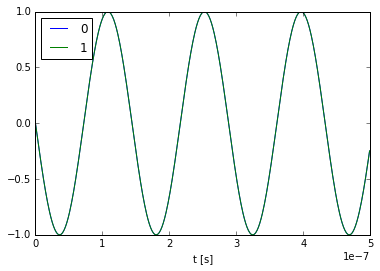

[ -1.00000001e+00   4.35681342e+07   1.89529499e-07] [[  2.60278611e-14   3.25866479e-12  -9.32173034e-17]
 [  3.25866479e-12   7.84090070e-04   1.50089948e-11]
 [ -9.32173034e-17   1.50089948e-11   1.31944793e-14]]
[ -9.99999996e-01   4.35681307e+07   2.06172640e-07] [[  3.89611563e-14   4.87875853e-12  -1.40501165e-16]
 [  4.87875853e-12   1.17370584e-03   2.26338820e-11]
 [ -1.40501165e-16   2.26338820e-11   2.00332738e-14]]


In [204]:
Mx1 = tree1[6]
Mx2 = tree2[6]
Mz1 = tree1[8]
Mz2 = tree2[8]
M1 = np.cos(np.arctan2(Mz1,Mx1))
M2 = np.cos(np.arctan2(Mz2,Mx2))
spl.plot_comparative('', [M1[:500], M2[:500]], time1[:500], 'show')

pars_M1, covs_M1 = curve_fit(sinus, time1, M1, [-1, 4.3568e7, 0])
print pars_M1, covs_M1
pars_M2, covs_M2 = curve_fit(sinus, time2, M2, [-1, 4.3568e7, 0])
print pars_M2, covs_M2

In [168]:
My1 = tree1[7]
My2 = tree2[7]
#spl.plot_comparative('', [My1[9000:9500], My2[9000:9500]], time1[:500], 'show')

In [169]:
def magnitude(x, y, z):
    return np.sqrt(x**2 + y**2 + z**2)

def calc_proj(vx, vy, vz, Mx, My, Mz):
    return (vx*Mx + vy*My + vz*Mz)/(magnitude(vx, vy, vz) * magnitude(Mx, My, Mz))

MV1 = calc_proj(vx1, vy1, vz1, Mx2, My2, Mz2)
MV2 = calc_proj(vx2, vy2, vz2, Mx1, My1, Mz1)

pars_calc1, covs_calc1 = curve_fit(cosinus, time1, MV1, [1, theo, 0])
print pars_calc1[1] - theo
pars_calc2, covs_calc2 = curve_fit(cosinus, time2, MV2, [1, theo, 0])
print pars_calc2[1] - theo

-3.42590038688
21.3588375247


In [63]:
r = gamma*vxz.mean()/(chargeToMassRatio*1.4513)
r

NameError: name 'gamma' is not defined

In [69]:
Av = (vxz.max()-vxz.min())/2

In [26]:
psi0 = np.arctan(vy.max()/vxz.min())
C_P = psi0**2/4
C_P

7.8101894582793548e-08

In [73]:
k=2*4.8e6
beta=vxz.mean()/299792458.
B = 1.4513
R0 = 7.112
n = k*R0/(vxz.mean()*B)
#n=0.122
chargeToMassRatio = 1.6021766208e-19 / 1.883531594e-28
gamma = 1/np.sqrt(1 - beta**2)
r = gamma*vxz.mean()/(chargeToMassRatio*1.4513)
xe2 = gamma**2*(vxz.mean()**2 + Av**2/2)/(chargeToMassRatio**2*B**2) - 2*R0*gamma*vxz.mean()/(chargeToMassRatio*B) + R0**2
#C_E = -2*k*(vxz.mean()*B - k*R0)*xe2/(R0*B**2*299792458.**2)
#C_E = -2*n*(1-n)*beta**2 *xe2/(R0**2)
C_E = -2*n*(1-n)*beta**2 *(r-7.112)**2/(R0**2)
#-2*0.157*(1-0.157)*0.9994**2*1e-4/R0**2
C_E
n

0.15701382672732603

In [79]:
n = 0.122
r_e = 7.111
R0 = 7.112
beta = 0.9994
x_e = r_e - R0
C_E = -2*n*(1-n)*beta**2 *x_e**2/(R0**2)
C_E

-4.230381522264032e-09

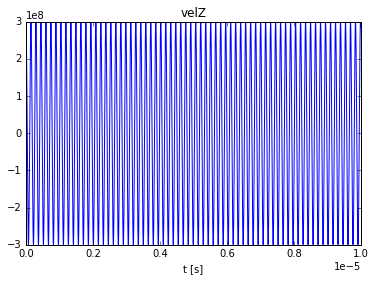

In [16]:
spl.plot_single('velZ', vz, time_arr, 'show')

In [17]:
x = tree[0]
z = tree[2]

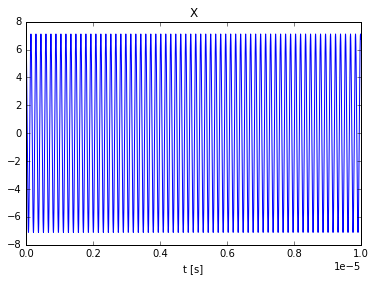

In [18]:
spl.plot_single('X', x, time_arr, 'show')

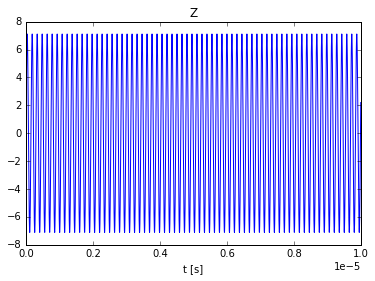

In [19]:
spl.plot_single('Z', z, time_arr, 'show')

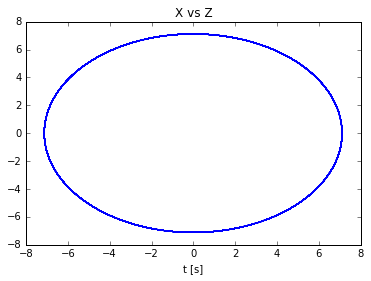

In [10]:
spl.plot_single('X vs Z', x, z, 'show')

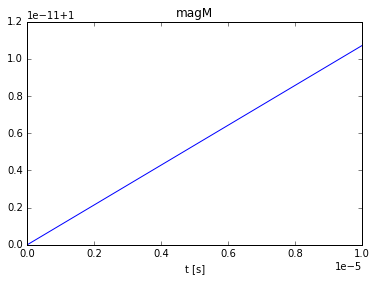

In [20]:
magM = tree[9]
spl.plot_single('magM', magM, time_arr, 'show')

/usr/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


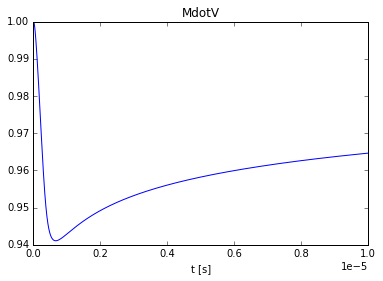

In [3]:
MdotV = tree[10]
spl.plot_single('MdotV', MdotV, time_arr, 'show')

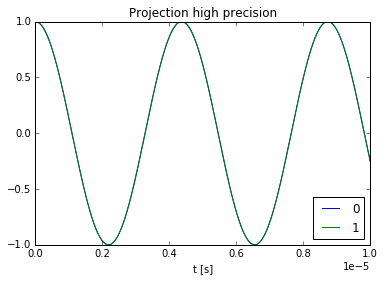

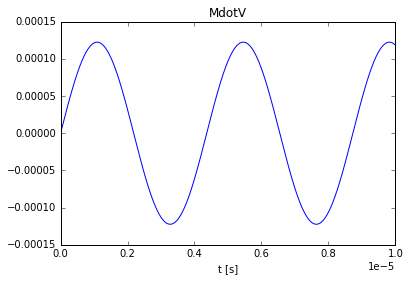

-1.74129381776e-05
[[  3.78821951e-13   2.87175099e-09  -2.48235800e-14]
 [  2.87175099e-09   1.04962479e-02   2.14988340e-09]
 [ -2.48235800e-14   2.14988340e-09   1.86123530e-13]]
17.9330395178


In [186]:
MdotV1 = tree1[10]
MdotV2 = tree2[10]
spl.plot_comparative("Projection high precision", [MdotV1, MdotV2], time1, "show")
MV_res = MdotV1 - MdotV2
spl.plot_single('MdotV', MV_res, time2, 'show')
MV_res[0]

pars_real1, covs_real1 = curve_fit(cosinus, time1, MdotV1, [1, theo, 0])
print pars_real1[1] - theo
pars_real2, covs_real2 = curve_fit(cosinus, time2, MdotV2, [1, theo, 0])
print covs_real2
print pars_real2[1] - theo

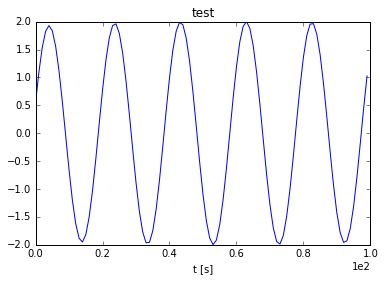

In [82]:
testtime = np.float_(range(100))
sin1 = np.sin(6.5*testtime/20)
sin2 = np.sin(6.3*testtime/20 + 10)
res = sin1-sin2
spl.plot_single('test', res, testtime, 'show')

In [25]:
def cosinus(t, A, w, o):
    return A*np.cos(w*t) + o

def sinus(t, A, w, o):
    return A*np.sin(w*t) + o

theo = 1.6021766208e-19*0.00116592091*1.4513/1.883531594e-28
theo

1439341.2340931583

In [31]:
pars, covs = curve_fit(cosinus, time_arr, MdotV, [1, theo, 0])
print pars, covs

[  1.00000000e+00   1.43934123e+06  -8.70335214e-14] [[  2.53529312e-29   1.92253560e-25  -1.66176908e-30]
 [  1.92253560e-25   7.02494166e-19   1.43899764e-25]
 [ -1.66176908e-30   1.43899764e-25   1.24642573e-29]]


In [142]:
pars[1]-theo

17.933039039606228

In [143]:
(pars[1]-theo)/theo

1.2459199121676488e-05

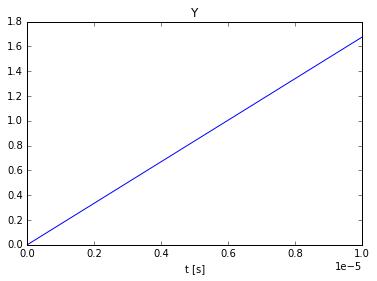

In [6]:
y = tree[1]
spl.plot_single('Y', y, time_arr, 'show')

In [10]:
beta_y = 1.5592e7
ypars, ycovs = curve_fit(cosinus, time_arr, y, [0.01, beta_y])
print ypars, ycovs

[ -9.39041573e-04   1.56843282e+07] [[  9.93772479e-09   9.05718421e-03]
 [  9.05718421e-03   3.36221152e+08]]


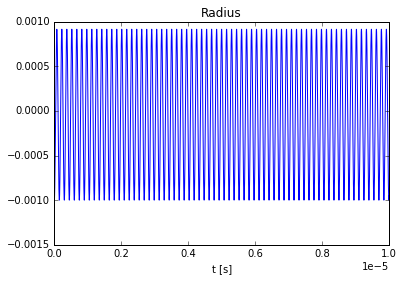

-4.3457928829494933e-05

In [209]:
r = np.sqrt(x**2 + z**2) - 7.112
spl.plot_single('Radius', r, time_arr, 'show')
r.mean()

In [18]:
index = np.argmax(r>=0)
r[index]
v_abs = vxz[index]
phi = np.arctan2(z[index],x[index])
print phi
theta = np.arctan2(-vx[index], vz[index])
print theta
delta = phi - theta
tan = v_abs * np.cos(delta)
rad = v_abs * np.sin(delta)
print tan, rad
print v_abs, np.sqrt(tan**2 + rad**2)

1.7695544793
1.7694320967
299617839.403 36668.0099668
299617841.646 299617841.646


In [42]:
beta_r = 3.9134e7
rpars, rcovs = curve_fit(cosinus, time_arr, r, [0.01, beta_r])
print rpars, rcovs

[  2.06965775e-04   3.91294312e+07] [[  8.64727298e-11   1.49119721e-04]
 [  1.49119721e-04   6.04497443e+07]]


In [48]:
def lin(xdata, slope, intercept):
    return slope*xdata + intercept

def lin_zero(xdata, slope):
    return slope*xdata

In [49]:
params, cov = curve_fit(lin, time_arr, phi[:-1], [theo*g, 1.57])
print params

[  4.21749684e+07   1.57079635e+00]


In [51]:
params[0]/g

1439257.8940922038

In [50]:
print cov

[[  5.39654211e-03  -9.20110432e-10]
 [ -9.20110432e-10   2.09173304e-16]]


In [35]:
print theo*g

42177410.5506


In [ ]:
pars, covs = curve_fit(lin_zero, time_arr*29.3, abs_phi[0][1]/29.3, [0.91517056/29.3])
print pars, covs

In [38]:
fpars, fcovs = curve_fit(lin, time_arr[10000:], phi[10000:-1]/time_arr[10000:], [0, theo*g])
print fpars, fcovs

[        0.          52539694.83350918] [[ inf  inf]
 [ inf  inf]]


/usr/lib/python2.7/dist-packages/scipy/optimize/minpack.py:690: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


In [ ]:
#spl.plot_comparative('Phase difference in Lab - Ax=10mm - B_sext', [abs_phi[0][1]/29.3, lin_zero(time_arr*29.3, 0.00106602)], time_arr*29.3, 'both', r'$\Delta \varphi$ [rad]', ['Simulation', 'Linear Fit, slope 0.00106602'], '.-', False)

spl.plot_comparative('Frequency difference in CF - Ax=10mm - B_sext', [abs_phi[0][1][1:]/time_arr[1:], lin(time_arr[1:], 0, 9.15171288e-01)], time_arr[1:], 'both', r"$\delta \omega'$ [rad s$^{-1}$]", ['Simulation', 'Linear Fit, offset 9.15171288e-01'], '.-')


In [ ]:
def sinus(t, A, w):
    return A*np.sin(w*t)
def sinus_dec(t, A, w):
    return (A/t)*np.sin(w*t)
#sinpars, sincovs = curve_fit(sinus, time_arr, abs_phi[0][0], [7.0773e-6, 1.1466e09])
#print sinpars, sincovs

In [ ]:
def combined_zero(t, A, w, s):
    return sinus(t, A, w) + lin_zero(t, s)
def combined(t, A, w, s, o):
    return sinus_dec(t, A, w) + lin(t, s, o)
#compars, comcovs = curve_fit(combined_zero, time_arr*29.3, abs_phi[0][0]/29.3, [7.0773e-6/29.3, 1.1466e09/29.3, 0])
#print compars, comcovs

In [ ]:
print cov
print covs

In [ ]:
old_base=spl.make_tree_to_array(17)[4]
old_total=spl.make_tree_to_array(32)
old_phi=spl.delta_phi(old_total[4], old_base, True)

In [ ]:
old_pars, old_covs = curve_fit(lin_zero, time_arr, old_phi, [12])
print old_pars, old_covs

In [ ]:
np.max(abs_phi[0][0])

In [ ]:
middle = ['Ax=10mm', 'Ay=10mm', 'Ax=Ay=10mm']
end = ['B_quad', 'B_sext', 'B_total']
for i in range(3):
    for j in range(3):
        cfphase_pars, cfphase_covs = curve_fit(combined_zero, time_arr, abs_phi[i][j], [abs_phi[i][j][-1]/23.9e-6])
        spl.plot_comparative('Phase difference in CF - '+middle[i]' - '+end[j], [abs_phi[i][j], lin_zero(time_arr, cfphase_pars[0])], time_arr, 'both', r'$\Delta \varphi$ [rad]', ['Simulation', 'Linear Fit, slope '+str(cfphase_pars[0])], '.-')
        
        lphase_pars, lphase_covs = curve_fit(lin_zero, time_arr*29.3, abs_phi[i][j]/29.3, [abs_phi[i][j][-1]/(29.3*29.3*23.9e-6)]
        spl.plot_comparative('Phase difference in Lab - '+middle[i]' - '+end[j], [abs_phi[i][j]/29.3, lin_zero(time_arr*29.3, lphase_pars[0])], time_arr*29.3, 'both', r'$\Delta \varphi$ [rad]', ['Simulation', 'Linear Fit, slope '+str(lphase_pars[0])], '.-')
        
        cgfreq_pars, cffreq_covs = curve_fit
                                             